# ECON408: Computational Methods in Macroeconomics

Deterministic Dynamics and Introduction to Growth Models

Jesse Perla (University of British Columbia)

# Overview

## Motivation and Materials

-   In this lecture, we will introduce (non-linear) dynamics
    -   This lets us explore stationarity and convergence
    -   We will see an additional example of a **fixed point** and
        **convergence**
-   The primary applications will be to simple models of growth, such as
    the **Solow** growth model.

## Materials

-   Adapted from QuantEcon lectures coauthored with John Stachurski and
    Thomas J. Sargent
    -   [Julia by
        Example](https://julia.quantecon.org/getting_started_julia/julia_by_example.html)
    -   [Dynamics in One
        Dimension](https://julia.quantecon.org/introduction_dynamics/scalar_dynam.html)

In [1]:
using LaTeXStrings, LinearAlgebra, Plots
default(;legendfontsize=16)

# Difference Equations

## (Nonlinear) Difference Equations

$$
x_{t+1} = h(x_t)
$$

-   A **time homogeneous first order difference equation**
    -   $h : S \to S$ for some $S \subseteq \mathbb{R}$ in the
        univariate case
    -   $S$ is called the **state space** and $x$ is called the **state
        variable**.
    -   Time homogeneity: $g$ is the same at each time $t$
    -   First order: depends on one lag (i.e., $x_{t+1}$ and $x_t$ but
        not $x_{t-1}$)

## Trajectories

-   An initial condition $x_0$ is required to solve for the sequence
    $\{x_t\}_{t=0}^\infty$
-   Given this, we can generate a **trajectory** recursively $$
    \begin{aligned}
    x_1 &= h(x_0) \\
    x_2 &= h(x_1) = h(h(x_0)) \\
    x_{t+1} &= h(x_t) = h(h(\ldots h(x_0))) \equiv h^t(x_0)
    \end{aligned}
    $$
-   If not time homogeneous, we can write $x_{t+1} = h_t(x_t)$
-   Stochastic if $x_{t+1} = h(x_t, \epsilon_{t+1})$ where
    $\epsilon_{t+1}$ is a random variable

## Linear Difference Equations

$$
x_{t+1} = a x_t + b
$$ For constants $a$ and $b$. Iterating, $$
\begin{aligned}
x_1 &= h(x_0) = a x_0 + b\\
x_2 &= h(h(x_0)) = a (a x_0 + b) + b = a^2 x_0 + a b + b\\
x_3 &= a(a^2 x_0 + a b + b) + b = a^3 x_0 + a^2 b + a b + b\\
\ldots & \\
x_t &= b \sum_{j=0}^{t-1} a^j + a^t x_0 = b \frac{1 - a^t}{1 - a} + a^t x_0
\end{aligned}
$$

## Convergence and Stability for Linear Difference Equations

-   If $|a| < 1$, take limit to check for **global stability**, for all
    $x_0$ $$
    \lim_{t\to\infty} x_t = \lim_{t\to\infty}g^{t-1}(x_0) = \lim_{t\to\infty}\left(b \frac{1 - a^t}{1 - a} + a^t x_0\right) =  \frac{b}{1 - a}
    $$
-   If $a = 1$ then diverges unless $b=0$ and $|a| > 1$ diverges for all
    $b$
-   Linear difference equations are either globally stable or globally
    unstable
-   Nonlinear difference equations may be **locally stable**
    -   For some $|x_0 - x^*| < \epsilon$ for some $x^*$ and
        $\epsilon > 0$. Global if $\epsilon = \infty$

## Nonlinear Difference Equations

-   We can ask the same questions for nonlinear $h(\cdot)$
-   Keep in mind the connection to the fixed points from the previous
    lecture
    -   If $h(\cdot)$ has a unique fixed point from any initial
        condition, it tells us about the dynamics
-   Connecting to **contraction mappings** etc. would help us be more
    formal, but we will stay intuitive here
-   Let us investigate nonlinear dynamics with a classic example

# Solow Growth Model

## Models of Economic Growth

-   There are different perspectives on what makes countries grow
    -   **Malthusian models:** population growth uses all available
        resources
    -   **Capital accumulation:** more capital leads to more output,
        tradeoff of consumption today to build more capital for tomorrow
    -   **Technological progress/innovation:** new ideas lead to more
        output, so the tradeoffs are between consumption today
        vs. researching technologies for the future
-   The appropriate model depends on country and time-period
    -   Malthusian models are probably most relevant right up until
        about the time he came up with the idea

## Exogenous vs. Endogenous

-   In these, the tradeoffs are key
    -   Can be driven by some sort of decision driven by the agent’s
        themselves (e.g., government plans, consumers saving, etc.)
        endogenously
    -   Or exogenously choose, not responsive to policy and incentives
    -   You always leave some things exogenous to isolate a key force
-   What determines the longrun growth rate? Use **fixed points**!
    -   In models of capital accumulation, technology limits the longrun
        growth
    -   Models of innovation choice often called **endogenous growth
        models**

## Solow Model Summary

-   The **Solow** model describes aggregate growth from the perspective
    of accumulating physical capital
    -   The tension is between **consumption** and **savings**
    -   Production not directed towards consumption goods is used to
        build capital for future consumption
    -   e.g. factories, robots, facilities, etc.
-   Endogeneity
    -   Technology and population growth are left fully exogenous
    -   Capital accumulation occurs through an exogenously given savings
        rate
    -   The neoclassical growth model endogenizing that rate

## Technology

-   In this economy, output is produced by combining labor and capital

-   Labor $N_t$, which we assume is supplied **inelastically**

    -   Assume it is proportional to the population

-   Capital, $K_t$, which is accumulated over time

-   In addition, **total factor productivity (TFP)**, $z_t$, is the
    technological level in the economy

-   The physical output from operating the technology is:

    $$
    Y_t = z_t F(K_t, N_t)
    $$

## Properties of the Technology Function

-   Note that land, etc. are NOT a factor of production

-   We will assume $F(\cdot, \cdot)$ is **constant returns to scale**

    $$
    F(\alpha K, \alpha N) = \alpha F(K, N) \quad \forall \alpha > 0
    $$

-   Assume $F$ has **diminishing marginal products**

    -   i.e. $\frac{\partial F(K, N)}{\partial K} > 0$,
        $\frac{\partial F(K, N)}{\partial N} > 0$,
        $\frac{\partial^2 F(K, N)}{\partial K^2} < 0$,
        $\frac{\partial^2 F(K, N)}{\partial N^2} < 0$

## Constant Returns to Scale

-   Define output per worker as $y_t = Y_t/N_t$ and capital per worker
    as $k_t = K_t/N_t$

-   Take $F$, divide by $N_t$, use CRS, and define $f(\cdot)$

    $$
    \begin{aligned}
    Y_t &= z_t F(K_t, N_t)\\
    \frac{Y_t}{N_t} &= \frac{z_t F(K_t, N_t)}{N_t}\\
    y_t &= z_t F\left(\frac{K_t}{N_t}, \frac{N_t}{N_t}\right) = z_t F(k_t, 1) \equiv z_t f(k_t)
    \end{aligned}
    $$

    -   $f$ also has diminishing marginal products, $f'(k) > 0$,
        $f''(k) < 0$

## Population Growth

-   From some initial condition $N_0$ for population
-   Assume that population grows at a constant rate $g_N$, i.e. $$
    N_{t+1} = (1 + g_N) N_t
    $$
-   Hence $N_{t+1}/N_t = 1 + g_N$ and $N_t = (1 + g_N)^t N_0$
-   If $g_N < 0$ then shrinking population

## Capital Accumulation

-   Capital is accumulated by **investment**, $X_t$, with per capital
    $x_t \equiv X_t/N_t$
    -   Macroeconomists should think in “allocations”, not “dollars”!
-   Output, $Y_t$ from production can be used for consumption or
    investment
-   Between periods, $\delta \in (0,1)$ proportion of capital
    depreciates
    -   e.g. machines break down, buildings decay, etc.

$$
\begin{aligned}
C_t + X_t &= Y_t \equiv \underbrace{z_t F(K_t, N_t)}_{\text{Total Output}}\\
\underbrace{K_{t+1}}_{\begin{smallmatrix} \text{Next} \\ \text{periods} \\ \text{capital} \end{smallmatrix}} &= \underbrace{(1-\delta)}_{\begin{smallmatrix}\text{depreciation} \\ \text{of capital} \end{smallmatrix}} K_t + \underbrace{X_t}_{\begin{smallmatrix}\text{investment} \\ \text{in new} \\ \text{capital}  \end{smallmatrix}}, \delta \in (0,1)
\end{aligned}
$$

## Per Capita Capital Dynamics

-   Recall that $N_{t+1}/N_t = 1 + g_N$ and $y_t = z_t f(k_t)$ $$
    \begin{aligned}
    \frac{K_{t+1}}{N_t} &= (1-\delta) \frac{K_t}{N_t} + \frac{X_t}{N_t}\\
    \frac{N_{t+1}}{N_{t+1}} \frac{K_{t+1}}{N_t} &= \left(\frac{N_{t+1}}{N_t}\right) \left(\frac{K_{t+1}}{N_{t+1}} \right) = (1-\delta) \frac{K_t}{N_t} + \frac{X_t}{N_t} \\
    k_{t+1}(1+g_N) &= (1-\delta) k_t + x_t
    \end{aligned}
    $$
-   So, the per-capita dynamics of capital are $$
    k_{t+1} = \frac{1}{1+g_N} \left[(1-\delta) k_t + x_t\right]
    $$

## Savings

-   In the Solow model, the savings rate is exogenously given as
    $s \in (0,1)$
    -   In the neoclassical growth model, it is endogenously determined
        based on consumer or planner preferences
-   Hence, $x_t = s y_t = s z_t f(k_t)$. Combine with previous dynamics
    to get $$
    k_{t+1} = \frac{1}{1+g_N} \left[(1-\delta) k_t + s z_t f(k_t)\right]
    $$
-   Given assumptions on $f(\cdot)$, this is a nonlinear difference
    equation given an exogenous $z_t$ process
-   With this, we can analyze the dynamics of $y_t$, $k_t$, and $c_t$
    over time

## Steady State

-   Assume that $z_t = \bar{z}$ is constant over time
-   Look for **steady state**: $k_{t+1} = k_t = \bar{k}$ and
    $y_{t+1} = y_t = \bar{y}$, etc.
    -   Note that this is a **fixed point** of the dynamics. May or may
        not exist

    $$
    \begin{aligned}
    \bar{k} &= \frac{1-\delta}{1+g}\bar{k} + \frac{s \bar{z}}{1+g}f(\bar{k})                                 \\
    \left(\frac{1+g}{1+g}-\frac{1-\delta}{1+g} \right)\bar{k} &= \frac{s \bar{z}}{1+g}f(\bar{k}) \\
    \underbrace{(g+\delta)\bar{k}}_{\text{Growth-adjusted depreciation}} &= \underbrace{s \bar{z} f(\bar{k})}_{\text{investment per capita}} \\
    \end{aligned}
    $$

## Example Production Function

-   Consider production function of $f(k) = k^{\alpha}$ for
    $\alpha \in (0,1)$

-   In this case, $\alpha$ will be interpretable as the **capital
    share** of income

    $$
    \bar{k} = \left(\frac{s \bar{z}}{g + \delta}\right)^{\frac{1}{1-\alpha}}
    $$

## Visualizing the Steady State


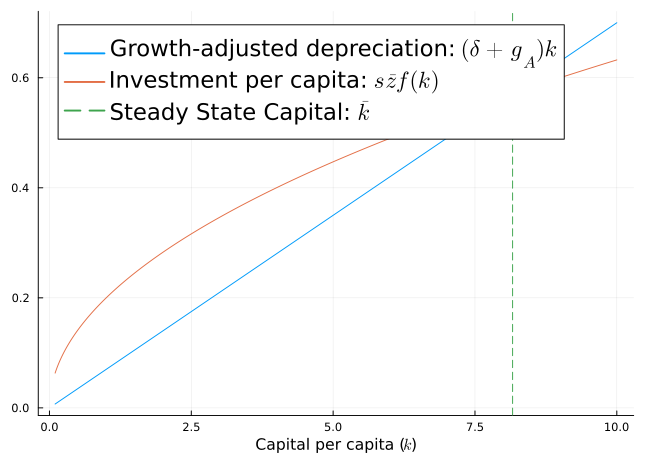

In [2]:
g_A = 0.02
delta = 0.05
s = 0.2
z = 1.0
alpha = 0.5
k_bar = (s * z / (g_A + delta))^(1/(1-alpha))

k_values = 0.1:0.01:10.0
lhs = (g_A + delta) * k_values
rhs = s * z .* k_values.^alpha

plot(k_values, lhs, label=L"Growth-adjusted depreciation: $(\delta + g_A)k$",
     xlabel=L"Capital per capita ($k$)")
plot!(k_values, rhs, label=L"Investment per capita: $s \bar{z} f(k)$")
vline!([k_bar], label=L"Steady State Capital: $\bar{k}$", linestyle=:dash)

## Wages and Rental Rate of Capital

-   Production could be run by a planner, or by a set of firms
-   Consider (real) profit maximizing firms. Price normalized to 1
    -   Hire labor and capital at real rates $w_t$ and $r_t$
        respectively $$
        \max_{K_t, N_t}\left[z_t F(K_t, N_t) - w_t N_t - r_t K_t\right]
        $$
-   The first order conditions are $$
    \begin{aligned}
    z_t \frac{\partial F(K_t, N_t)}{\partial K_t}  &= r_t \\
    z_t \frac{\partial  F(K_t, N_t) }{\partial N_t}&= w_t
    \end{aligned}
    $$

## Using Constant Returns to Scale

-   Can show that for any CRS $F(K_t, N_t)$ that
    $\frac{\partial F(\gamma K_t, \gamma N_t)}{\partial K_t} = \frac{\partial F(K_t, N_t)}{\partial K_t}$
    -   Same for $N_t$ derivative. ,
-   Set $\gamma = 1/N_t$ and write the marginal products as ratios, $$
    \begin{aligned}
    \frac{\partial F(K_t, N_t)}{\partial K_t} &= f'(K_t/N_t) = f'(k_t)\\
    \frac{\partial F(K_t, N_t)}{\partial N_t} &= f(k_t) - k_t f'(k_t)
    \end{aligned}
    $$

## Wages and Rental Rate of Capital

-   Finally, we can write $$
    \begin{aligned}
    r_t &= z_t f'(k_t)\\
    w_t &= z_t f(k_t) - z_t f'(k_t) k_t
    \end{aligned}
    $$
-   For the Cobb-Douglas production function
    $F(K_t, N_t) = K_t^{\alpha} N_t^{1-\alpha}$, we have $$
    \begin{aligned}
    f(k_t) &= k_t^{\alpha} \\
    f'(k_t) &= \alpha k_t^{\alpha - 1}\\
    r_t &= \alpha z_t  k_t^{\alpha - 1}\\
    w_t &= z_t k_t^{\alpha} - z_t \alpha k_t^{\alpha - 1} k_t =(1 - \alpha) z_t k_t^{\alpha} 
    \end{aligned}
    $$

## Shares of Income

-   Recall that per-capita output is $y_t = z_t f(k_t)$
-   $w_t = (1 - \alpha) z_t k_t^{\alpha}$
    -   Interpret $1-\alpha$ as the **labor share** of output, or income
-   $r_t k_t = \alpha z_t k_t^{\alpha}$
    -   Interpret $\alpha$ as the **capital share**
-   Key to these expressions were competitive markets in hiring
    labor/capital
    -   i.e., workers end up paid their marginal products

# Solow Model Dynamics

## Summary of Equations

-   Exogenous $z_t$ sequence. e.g., $z_{t+1}/z_t = 1 + g_z$ given some
    initial $z_0$

-   Population growth $N_{t+1}/N_t = 1 + g_N$ given some initial $N_0$

    $$
    k_{t+1} = \frac{1}{1+g_N} \left[(1-\delta) k_t + s z_t f(k_t)\right],\quad \text{given } k_0
    $$

    -   Output per capita $y_t = z_t f(k_t)$
    -   Consumption per capita $c_t = (1-s) y_t = (1-s) z_t f(k_t)$

-   Wages $w_t = (1 - \alpha) z_t k_t^{\alpha}$ and rental rate of
    capital $r_t = \alpha z_t k_t^{\alpha - 1}$

-   Steady state capital
    $\bar{k} = \left(\frac{s \bar{z}}{g_N + \delta}\right)^{\frac{1}{1-\alpha}}$
    if $g_z = 1$ and $z_0 = \bar{z}$

## 45 Degree Diagram

-   With a fixed point $k_{t+1} = h(k_t)$ note that a fixed point is
    when $\bar{k} = h(\bar{k})$
-   We can plot the dynamics of the sequence comparing the functions to
    the 45 degree line where that occurs
-   This diagram will help us interpret stability and convergence

## Iteration

-   First, lets write a general function to iterate a (univariate) map

In [3]:
function iterate_map(f, x0, T)
    x = zeros(T + 1)
    x[1] = x0
    for t in 2:(T + 1)
        x[t] = f(x[t - 1])
    end
    return x
end

iterate_map (generic function with 1 method)

## Plotting the Dynamics

In [4]:
function plot45(f, xmin, xmax, x0, T; num_points = 100, label = L"h(k)",
                xlabel = "k", size = (600, 500))
    # Plot the function and the 45 degree line
    x_grid = range(xmin, xmax, num_points)
    plt = plot(x_grid, f.(x_grid); xlim = (xmin, xmax), ylim = (xmin, xmax),
               linecolor = :black, lw = 2, label, size)
    plot!(x_grid, x_grid; linecolor = :blue, lw = 2, label = nothing)

    # Iterate map and add ticks
    x = iterate_map(f, x0, T)
    xticks!(x, [L"%$(xlabel)_{%$i}" for i in 0:T])
    yticks!(x, [L"%$(xlabel)_{%$i}" for i in 0:T])

    # Plot arrows and dashes
    for i in 1:T
        plot!([x[i], x[i]], [x[i], x[i + 1]], arrow = :closed, linecolor = :black,
              alpha = 0.5, label = nothing)
        plot!([x[i], x[i + 1]], [x[i + 1], x[i + 1]], arrow = :closed,
              linecolor = :black, alpha = 0.5, label = nothing)
        plot!([x[i + 1], x[i + 1]], [0, x[i + 1]], linestyle = :dash,
              linecolor = :black, alpha = 0.5, label = nothing)
    end
    plot!([x[1], x[1]], [0, x[1]], linestyle = :dash, linecolor = :black,
          alpha = 0.5, label = nothing)
end

plot45 (generic function with 1 method)

## Solow Parameter Examples


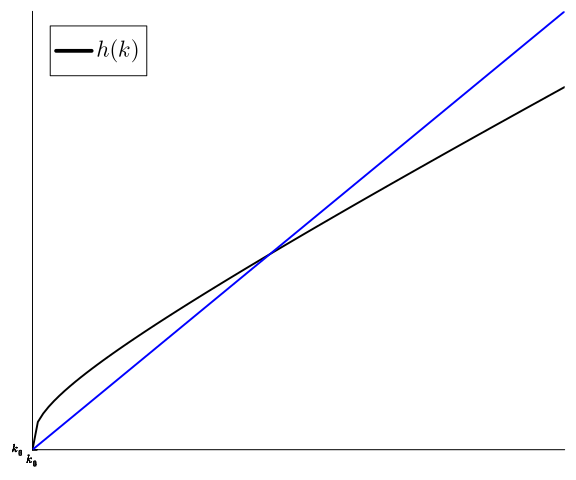

In [5]:
p = (z_bar = 2, s = 0.3, alpha = 0.3,
     delta = 0.4, g_N = 0.0)
k_p(k; p) = (1 / (1 + p.g_N)) * (
   p.s * p.z_bar * k^p.alpha
   + (1 - p.delta) * k)
k_min = 0.0
k_max = 4.0
plot45(k -> k_p(k; p), k_min, k_max, 0, 6)